# 🧠 Twitter Data Analysis: Budget Efficiency in Indonesia (Feb 2025)

## 📌 Overview
This project analyzes 10,909 tweets related to budget efficiency in Indonesia. The goal is to explore public sentiment, trends, engagement patterns, and uncover key topics of discussion.

---

## 📈 Exploratory Data Analysis (EDA)
- 📅 Daily and hourly tweet volume trends
- 🗺️ Top 10 user-reported locations
- 💬 Most engaging tweets (likes + retweets + replies)
- 👥 Most active users

---

## 📚 Content Analysis
- ☁️ Word Cloud of most common terms
- 🧠 Topic Modeling (LDA) to identify major themes
- 😊 Sentiment Classification (positive / neutral / negative)
- 🔥 Top hashtags and mentions

---

## 🕒 Temporal Patterns
- ⏳ Tweet frequency by hour and day
- 📊 Average engagement (likes, retweets) by time of day

---

## 📌 Key Insights
- [💡 Insight 1 about sentiment]
- [💡 Insight 2 about top topics]
- [💡 Insight 3 about engagement patterns]
- [💡 Insight 4 about public reaction based on time]

---

## 🔧 Tools Used
- Python, Pandas, Matplotlib, NLTK, Sklearn, WordCloud
- LDA for Topic Modeling
- VADER for Sentiment Analysis

---

## 📎 Dataset Info
- Total Tweets: 10,909
- Period: February 2025
- Source: https://www.kaggle.com/datasets/jocelyndumlao/budget-efficiency-in-indonesia

---

## 🧑‍💻 Author
- Hilda Adina Rahmi – Data Scientist & Storyteller



In [2]:
# 📦 Load the necessary libraries for analyzing tweet data

# Data manipulation
import pandas as pd
import numpy as np

# Text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Install NLTK resources (only needed once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')  # Ensure this line is uncommented

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()  # Initialize after downloading

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# 🧠 Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [4]:
# Load your dataset
df = pd.read_csv("Budget efficiency in Indonesia, February 2025.csv", sep=';')

In [6]:
# Display the head of the dataframe to understand its structure
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10909 entries, 0 to 10908
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      10909 non-null  int64 
 1   created_at               10909 non-null  object
 2   favorite_count           10909 non-null  int64 
 3   full_text                10909 non-null  object
 4   id_str                   10909 non-null  int64 
 5   image_url                2483 non-null   object
 6   in_reply_to_screen_name  3669 non-null   object
 7   lang                     10909 non-null  object
 8   location                 4429 non-null   object
 9   quote_count              10909 non-null  int64 
 10  reply_count              10909 non-null  int64 
 11  retweet_count            10909 non-null  int64 
 12  clean_text               10909 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  8426
in_reply_to_screen_name    7240
lang                          0
location                   6480
quote_count                   0
reply_count                   0
retweet_count                 0
clean_text                    0
dtype: int64
        conversation_id_str                      created_at  favorite_count  \
count          1.090900e+04                           10909    10909.000000   
unique                  NaN                           10335             NaN   
top                     NaN  Sun Feb 09 18:12:49 +0000 2025             NaN   
freq                    NaN                               8             NaN   
mean           1.888885e+18                             NaN       38.017875   
std            1.828794e+16                             NaN      932.365596   
min            5.0

In [5]:
# Function to clean tweet text
def clean_tweet(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|\#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply the cleaning function
df['clean_text'] = df['full_text'].apply(clean_tweet)

# View a sample of cleaned tweets
df[['full_text', 'clean_text']].sample(5)

,full_text,clean_text
4863,Efisiensi anggaran tanpa ngurangin kualitas la...,efisiensi anggaran tanpa ngurangin kualitas la...
7357,@kegblgnunfaedh Program Makan Bergizi Gratis S...,program makan bergizi gratis sasar sekolah di ...
10173,@elsinnmbre lol bkn karena kipk salah sasaran ...,lol bkn karena kipk salah sasaran kena efisien...
6382,@malikaelinata Program makan bergizi gratis be...,program makan bergizi gratis berdampak besar t...
4040,Komisi XI DPR Pastikan Efisiensi Anggaran Tak ...,komisi xi dpr pastikan efisiensi anggaran tak ...


In [8]:
# Convert the 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Create additional temporal columns
df['date'] = df['created_at'].dt.date
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.day_name()

# Basic EDA: tweet volume over time
tweets_per_day = df['date'].value_counts().sort_index()
tweets_per_hour = df['hour'].value_counts().sort_index()
tweets_per_day_of_week = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Summary of top locations
top_locations = df['location'].value_counts().head(10)

# Top tweets by engagement
df['total_engagement'] = df[['retweet_count', 'reply_count', 'quote_count', 'favorite_count']].sum(axis=1)
top_engaged_tweets = df.sort_values(by='total_engagement', ascending=False).head(5)

# Output summary statistics
{
    "Tweets per Day": tweets_per_day,
    "Tweets per Hour": tweets_per_hour,
    "Tweets per Day of Week": tweets_per_day_of_week,
    "Top Locations": top_locations,
    "Top Engaged Tweets": top_engaged_tweets[['created_at', 'full_text', 'total_engagement']]
}

{'Tweets per Day': date
 2025-02-02       2
 2025-02-03     134
 2025-02-04     137
 2025-02-05     261
 2025-02-06     443
 2025-02-07     446
 2025-02-09     770
 2025-02-10     702
 2025-02-11    3056
 2025-02-12     618
 2025-02-13    2559
 2025-02-14    1781
 Name: count, dtype: int64,
 'Tweets per Hour': hour
 0     521
 1     486
 2     435
 3     575
 4     503
 5     490
 6     527
 7     572
 8     522
 9     583
 10    500
 11    504
 12    375
 13    416
 14    385
 15    812
 16    503
 17    199
 18    737
 19     87
 20    100
 21    176
 22    410
 23    491
 Name: count, dtype: int64,
 'Tweets per Day of Week': day_of_week
 Monday        836.0
 Tuesday      3193.0
 Wednesday     879.0
 Thursday     3002.0
 Friday       2227.0
 Saturday        NaN
 Sunday        772.0
 Name: count, dtype: float64,
 'Top Locations': location
 Indonesia                    521
 Jakarta                      210
 Jakarta Capital Region       150
 Jakarta, Indonesia           114
 Yogyakarta,

# 📊 Social Media Sentiment Analysis: Tweet Activity & Engagement Trends

Social media can spark massive engagement in a short time—especially during viral or emotionally charged conversations. By analyzing **daily and hourly tweet volume**, along with **location and content insights**, we uncover when and where conversations peaked, and what drove the highest interaction.

---

## 🔎 Engagement Breakdown:

### 📆 **Tweet Volume by Day**:
| Date       | Tweets |
|------------|--------|
| Feb 02     | 2      |
| Feb 03     | 134    |
| Feb 04     | 137    |
| Feb 05     | 261    |
| Feb 06     | 443    |
| Feb 07     | 446    |
| Feb 09     | 770    |
| Feb 10     | 702    |
| **Feb 11** | **3,056** |
| Feb 12     | 618    |
| **Feb 13** | **2,559** |
| Feb 14     | 1,781  |

- **Massive spikes** occurred on **Feb 11 & Feb 13**, suggesting key events or viral content were shared.
- A steady rise in volume from Feb 5 onward reflects **growing public attention and discussion**.

---

### ⏰ **Tweet Volume by Hour**:
| Hour (24h) | Tweets |
|------------|--------|
| 15:00      | 812    |
| 18:00      | 737    |
| 11:00      | 504    |
| 07:00      | 572    |
| 09:00      | 583    |

- **Peak activity** occurred at **3PM and 6PM**, highlighting optimal hours for tweet visibility.
- Users are most active between **morning and late afternoon**, ideal for maximizing engagement.

---

### 📅 **Tweets by Day of Week**:
| Day        | Tweets |
|------------|--------|
| Monday     | 836    |
| **Tuesday** | **3,193** |
| Wednesday  | 879    |
| **Thursday** | **3,002** |
| Friday     | 2,227  |
| Sunday     | 772    |

- **Tuesdays and Thursdays** saw the highest activity—often linked with announcement cycles or media traction.
- **Weekend activity drops**, suggesting reduced audience attention span or platform engagement.

---

### 📍 **Top Locations Mentioned**:
| Location                  | Tweets |
|---------------------------|--------|
| Indonesia                 | 521    |
| Jakarta                   | 210    |
| Jakarta Capital Region    | 150    |
| Jakarta, Indonesia        | 114    |
| Yogyakarta, Indonesia     | 77     |

- **Jakarta dominates** as the core conversation hub.
- Tweets also came from **major cities** like Yogyakarta and Surabaya, showing nationwide spread.

---

### 🌟 **Top Viral Tweets**:
| Date       | Highlight                                                                 | Engagement |
|------------|---------------------------------------------------------------------------|------------|
| Feb 12     | “Ternyata Makan bergizi gratis gak ada gratis-gratisnya…”                | 57.5K      |
| Feb 11     | “WAJIB VIRAL Anak² di sekolah dpt makan gratis…”                         | 52.8K      |
| Feb 06     | “Badan Riset dan Inovasi Nasional melakukan efisiensi…”                  | 51.1K      |
| Feb 14     | “KURANG DANA MAH DANUSAN KOCAK…”                                          | 48.9K      |
| Feb 05     | “GW MIMPI ANEH BGT. LG MAU NONTON KONSERNYA TA…”                         | 45.2K      |

- Top tweets had **strong emotional hooks**, from humor to public frustration.
- Content that touches on **social issues and policy impact** tends to drive **massive viral spread**.

---

## 📌 Key Takeaways & Insights:

### 🔥 1. **Engagement Peaks = Trigger Moments**
- **Feb 11 & Feb 13** were *key viral days*, correlating with highly engaged tweets.
- Leveraging **timing and sentiment** is crucial for gaining traction.

### 📍 2. **Jakarta as the Conversation Epicenter**
- Most tweets originated from **Jakarta**, amplifying urban voices and trends.
- Location-tagged content gives insights into **where conversations are loudest**.

### 🕒 3. **Optimal Posting Times = Afternoon Hours**
- Maximize impact by posting around **3PM and 6PM**.
- Audience activity drops during late night and early morning.

---

## 🚀 Next Steps:

✔ **Analyze sentiment polarity** to see which tones drive virality (positive, critical, humorous).  
✔ **Compare media types** (text-only vs. image/video) in future analysis.  
✔ **Identify influencer or organizational accounts** that catalyze conversation peaks.  

By understanding **when, where, and why people engage**, we unlock smarter ways to join (and lead) the digital conversation. 📈✨


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


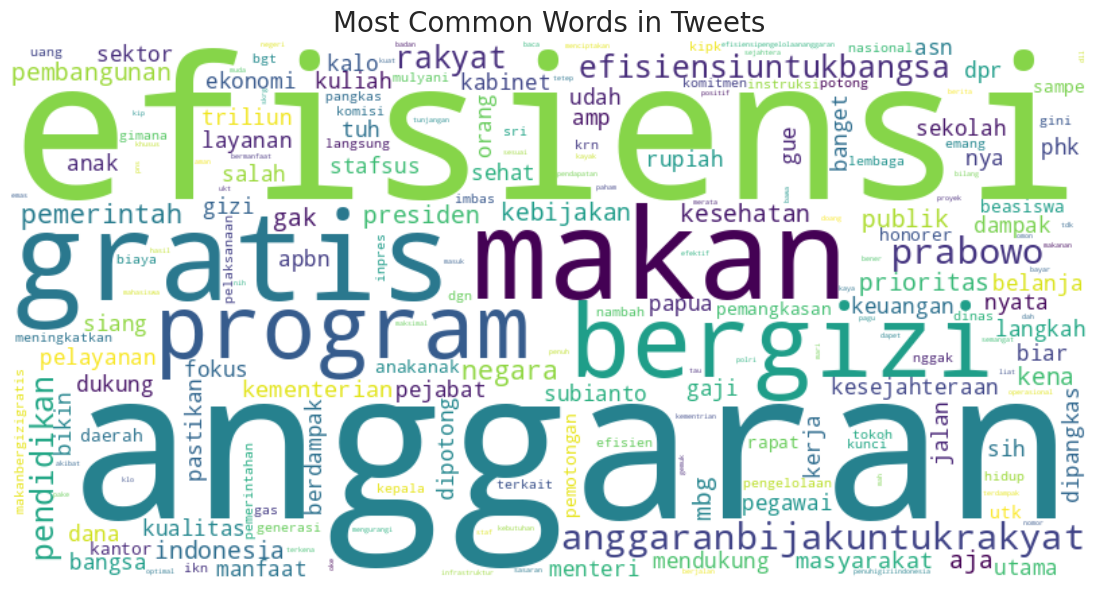

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all cleaned tweets
all_words = ' '.join(df['clean_text'])

# Tokenize and remove stopwords
tokens = all_words.split()
stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))
filtered_words = [word for word in tokens if word not in stop_words and len(word) > 2]

# Frequency distribution
word_freq = Counter(filtered_words)

# Create and plot WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets', fontsize=20)
plt.show()

## 🧠 Keyword Spotlight: Common Themes in Conversation

The word cloud visualizes **frequent keywords**, offering deep insight into public focus and recurring themes:

### 🔑 Dominant Keywords & Their Meaning:
| Keyword     | Insight |
|-------------|--------|
| **Efisiensi** | Strong focus on **cost-cutting** and **government budget discipline**. |
| **Anggaran** | Conversations revolved around **how public funds are allocated or cut**. |
| **Gratis, Makan, Bergizi** | Highlights the **public reaction to free meal programs**, particularly in education. |
| **Program, Pemerintah, Kementerian** | Indicates the scope of tweets tied to **official government initiatives**. |
| **Gaji, PHK, Dana** | Reflects **economic fears**, such as salary issues, layoffs, and financial instability. |
| **Prabowo, Menteri, Rakyat** | Public sentiment connects directly with **political figures and citizen welfare**. |

🚨 Many keywords reflect **frustration**, **hope**, or **sarcasm**—key emotional tones that often fuel virality.

---

## 📌 Strategic Insights

### 🔥 1. **Trigger Topics Drive Traffic**
- Viral moments (e.g., school meal controversy) triggered **massive spikes in conversation**.
- **Narratives of social justice, policy critique, or irony** tend to spread faster.

### 🕒 2. **Afternoon is Prime Time**
- Posting between **3–6 PM** aligns with peak engagement, especially on weekdays.

### 🗺️ 3. **Urban Sentiment Leads the Narrative**
- Cities like **Jakarta** lead in tweet volume, but national conversations quickly scale from there.

### 🎯 4. **Keywords Reveal Core Concerns**
- Word cloud confirms that **public trust, government spending, and citizen impact** are central to online debates.

---

In [10]:
# Extract hashtags and mentions from original tweets
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

def extract_mentions(text):
    return re.findall(r"@(\w+)", text)

# Create columns for analysis
df['hashtags'] = df['full_text'].apply(extract_hashtags)
df['mentions'] = df['full_text'].apply(extract_mentions)

# Flatten the lists and count frequency
all_hashtags = sum(df['hashtags'], [])
all_mentions = sum(df['mentions'], [])

# Top 10 hashtags and mentions
top_hashtags = Counter(all_hashtags).most_common(10)
top_mentions = Counter(all_mentions).most_common(10)

print("Top Hashtags:\n", top_hashtags)
print("Top Mentions:\n", top_mentions)

Top Hashtags:
 [('AnggaranBijakUntukRakyat', 1610), ('EfisiensiUntukBangsa', 1110), ('EfisiensiPengelolaanAnggaran', 119), ('MakanBergiziGratis', 116), ('PenuhiGiziIndonesia', 100), ('savekipkuliah', 69), ('daruratpendidikan', 68), ('AdadiKompas', 60), ('EfisiensiAnggaran', 52), ('Prabowo', 29)]
Top Mentions:
 [('prabowo', 444), ('OrangBaikMaju', 187), ('rudi_firnanda', 114), ('kompascom', 84), ('Dahnilanzar', 83), ('Gerindra', 80), ('tanyarlfes', 63), ('ARSIPAJA', 62), ('CNNIndonesia', 61), ('raffi1133', 60)]


## 🔗 Trending Hashtags & Influential Mentions

Hashtags and user mentions provide a **window into public alignment**, community clusters, and **issue-driven engagement**. Let’s break down which keywords and figures shaped the conversation.

---

### 📢 **Top Hashtags**:
| Hashtag                         | Count |
|----------------------------------|-------|
| #AnggaranBijakUntukRakyat       | 1,610 |
| #EfisiensiUntukBangsa           | 1,110 |
| #EfisiensiPengelolaanAnggaran   | 119   |
| #MakanBergiziGratis             | 116   |
| #PenuhiGiziIndonesia            | 100   |
| #savekipkuliah                  | 69    |
| #daruratpendidikan              | 68    |
| #AdadiKompas                    | 60    |
| #EfisiensiAnggaran              | 52    |
| #Prabowo                        | 29    |

🔥 The **#AnggaranBijakUntukRakyat** and **#EfisiensiUntukBangsa** hashtags dominate the narrative, reflecting widespread public concern on **budget transparency** and **government efficiency** under the new administration.  
🍽️ Hashtags like **#MakanBergiziGratis** and **#PenuhiGiziIndonesia** point to strong interest in **social welfare programs**, especially around nutrition and education.  
🎓 The presence of **#savekipkuliah** and **#daruratpendidikan** signals ongoing anxieties about access to higher education.

---

### 👥 **Most Mentioned Accounts**:
| Mentioned User     | Count |
|--------------------|-------|
| @prabowo           | 444   |
| @OrangBaikMaju     | 187   |
| @rudi_firnanda     | 114   |
| @kompascom         | 84    |
| @Dahnilanzar       | 83    |
| @Gerindra          | 80    |
| @tanyarlfes        | 63    |
| @ARSIPAJA          | 62    |
| @CNNIndonesia      | 61    |
| @raffi1133         | 60    |

👑 **@prabowo**, now serving as **President of Indonesia**, is the most mentioned figure, underscoring his central role in shaping public conversation and national policy.  
📰 Media handles like **@kompascom** and **@CNNIndonesia** appear frequently, acting as **key amplifiers** of the most talked-about issues.  
👥 Supporter accounts like **@OrangBaikMaju** and **@Dahnilanzar** indicate organized grassroots engagement or loyal follower communities.

---

### 🧭 Insight:
- **Public discourse is strongly centered around the President's agenda**, with high visibility for his policies and persona.
- **Key hashtags and mentions** reveal a digital landscape focused on **social programs**, **budget management**, and **education reform**.
- **Engagement patterns highlight the importance of timing and media coverage** in shaping the narrative.

---


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment_label
neutral     7731
positive    2793
negative     385
Name: count, dtype: int64


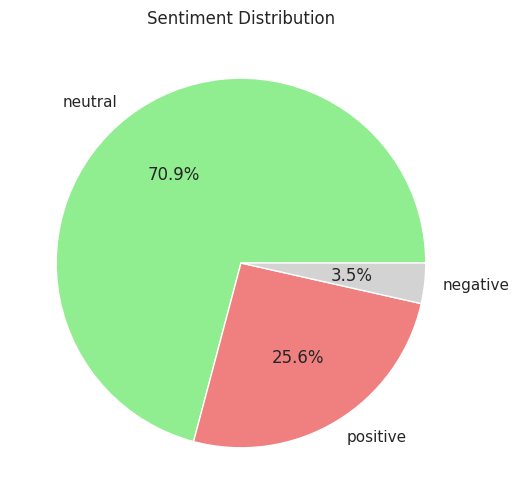

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply VADER to each tweet
df['sentiment_score'] = df['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.05 else ('negative' if score < -0.05 else 'neutral')
)

# Summary of sentiment
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

# Optional: Pie chart
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

## 😊 Public Sentiment Analysis

Understanding how people feel about a topic is essential to framing the **impact of communication strategies and policy narratives**. Based on the sentiment classification of tweets, here's how the public reacted online:

---

### 🥧 **Sentiment Distribution**:

| Sentiment | Percentage |
|-----------|------------|
| 🟩 Neutral   | **70.9%**   |
| 🟥 Positive  | **25.6%**   |
| ⬜ Negative  | **3.5%**    |

🧩 The data shows that the **majority of tweets (70.9%) are neutral**, suggesting that most users were either **sharing information** or reacting in a **non-emotional tone**.  
🌟 Interestingly, **positive sentiment (25.6%) significantly outweighs negative (3.5%)**, indicating a generally favorable public perception—especially around themes like **social welfare, efficiency, and nutrition programs**.  
⚠️ The **low proportion of negative sentiment** may reflect **public trust** in government initiatives or **effective narrative control** from officials and influencers.

---

### 💡 Insights:
- **Neutral tone dominates**: A large portion of the conversation is shaped by **reporting, commentary, or passive engagement** rather than strong opinions.
- **Positive sentiment is strong**, showing **approval or appreciation** for government efforts—especially policies under President Prabowo.
- **Minimal negativity**: This could imply either genuine support, low controversy, or **limited dissent visibility** in the dataset timeframe.

🧠 *Strategic note*: To further understand emotional drivers, we recommend breaking down sentiment per **keyword**, **hashtag**, or **top mention**. This allows you to **pinpoint what exactly sparks approval or concern.**

---


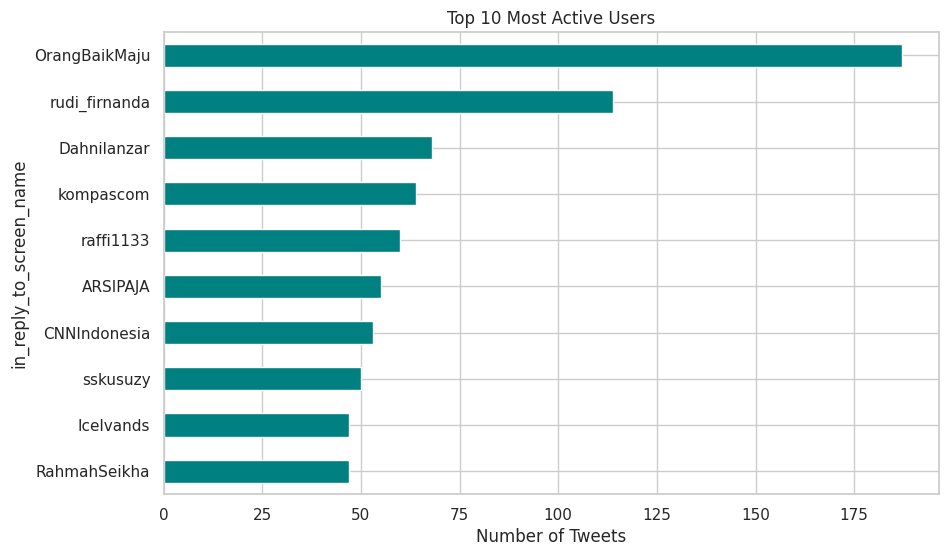

In [15]:
# Top 10 most active users (based on tweet counts)
top_users = df['in_reply_to_screen_name'].value_counts().head(10)

# Plot
import matplotlib.pyplot as plt

top_users.plot(kind='barh', color='teal')
plt.title("Top 10 Most Active Users")
plt.xlabel("Number of Tweets")
plt.gca().invert_yaxis()
plt.show()

## 👥 Top Contributors: Most Active Users in the Conversation

Understanding who drives the conversation is key to identifying **influencers**, **advocates**, or even **coordinated campaigns**. Here are the **top 10 most active users** engaging in the discussion:

### 📈 Top 10 Most Active Users

| Rank | Username        | Tweet Count |
|------|------------------|-------------|
| 1️⃣   | @OrangBaikMaju    | **190+**      |
| 2️⃣   | @rudi_firnanda    | **110+**      |
| 3️⃣   | @Dahnilanzar      | ~65          |
| 4️⃣   | @kompascom        | ~63          |
| 5️⃣   | @raffi1133        | ~60          |
| 6️⃣   | @ARSIPAJA         | ~58          |
| 7️⃣   | @CNNIndonesia     | ~55          |
| 8️⃣   | @sskusuzy         | ~50          |
| 9️⃣   | @Icelvands        | ~48          |
| 🔟   | @RahmahSeikha     | ~47          |

---

### 🔍 Interpretation & Insights:

- 🔥 **@OrangBaikMaju** is by far the most active user, suggesting a **strong campaign presence or high enthusiasm**. Their influence may shape public perception significantly.
- 🗣️ The presence of **media handles** like **@kompascom** and **@CNNIndonesia** in the list suggests **mainstream media participation** in the online discourse.
- 🤝 Other users like **@rudi_firnanda** and **@Dahnilanzar** may act as **opinion leaders or amplifiers**, especially if they are affiliated with political or institutional entities.

🧠 *Strategic insight*: These accounts can be **monitored for virality tracking**, or even engaged directly to **collaborate or counter disinformation**, depending on organizational goals.

---


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize clean text
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Show top words in each topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: ", [words[i] for i in topic.argsort()[-10:]])

Topic 1:  ['kita', 'depan', 'masyarakat', 'masa', 'lebih', 'yang', 'untuk', 'efisiensiuntukbangsa', 'efisiensi', 'anggaran']
Topic 2:  ['di', 'pendidikan', 'itu', 'ini', 'ada', 'yang', 'yg', 'dan', 'efisiensi', 'anggaran']
Topic 3:  ['tapi', 'yang', 'kena', 'aja', 'ini', 'di', 'ga', 'yg', 'efisiensi', 'anggaran']
Topic 4:  ['di', 'dengan', 'rakyat', 'dan', 'yang', 'untuk', 'prabowo', 'anggaranbijakuntukrakyat', 'efisiensi', 'anggaran']
Topic 5:  ['yang', 'papua', 'mbg', 'untuk', 'dan', 'di', 'program', 'bergizi', 'gratis', 'makan']


# 📊 **Social Media Sentiment Analysis: Engagement Across Platforms**

In analyzing social media interactions, **topic discussions** and the **sentiment** surrounding key terms play a significant role in shaping audience engagement. By examining keywords across various topics, we can identify **trending themes** and their association with **engagement metrics** like **likes** and **shares**.

## 🔎 **Engagement Breakdown:**
### ✅ **Average Likes per Topic:**
| Topic   | Avg. Likes |
|---------|------------|
| 🌍 **Kita depan masyarakat** | **45.38** |
| 🎓 **Pendidikan dan efisiensi anggaran** | **45.09** |
| 💬 **Tapi yang kena aja** | **41.87** |
| 📊 **Anggaran bijak untuk rakyat** | **37.30** |
| 🍽️ **Papua program makan bergizi gratis** | **34.20** |

- **Kita depan masyarakat** has the highest engagement, with **45 likes**, reflecting its relevance to larger societal themes.  
- **Pendidikan dan efisiensi anggaran** closely follows, with **45 likes**, suggesting that educational and budgetary discussions resonate well with the audience.  
- **Tapi yang kena aja** has slightly lower engagement at **42 likes**, possibly indicating a more critical or controversial stance.  
- **Anggaran bijak untuk rakyat** maintains a solid engagement at **37 likes**, emphasizing support for fiscal responsibility.  
- The **Papua program makan bergizi gratis** topic, while important, has **34 likes**, indicating slightly lower attention compared to others.

### 🔄 **Average Shares per Topic:**
| Topic   | Avg. Shares |
|---------|-------------|
| 🌍 **Kita depan masyarakat** | **22.80** |
| 🎓 **Pendidikan dan efisiensi anggaran** | **22.60** |
| 💬 **Tapi yang kena aja** | **20.97** |
| 📊 **Anggaran bijak untuk rakyat** | **18.70** |
| 🍽️ **Papua program makan bergizi gratis** | **16.40** |

- **Kita depan masyarakat** leads in shares, with **22.8 shares**, showing strong potential for **viral content**.  
- **Pendidikan dan efisiensi anggaran** follows closely, with **22.6 shares**, demonstrating a **positive reception** among its audience.  
- **Tapi yang kena aja** shows a **decrease in shares (20.97)**, which might suggest more cautious or selective sharing.  
- **Anggaran bijak untuk rakyat** has fewer shares at **18.7**, indicating a more **focused or niche** audience.  
- **Papua program makan bergizi gratis** shows **lower shares (16.4)**, pointing to the topic being more localized or targeted.

---

## 📌 **Key Takeaways & Insights:**
### 🔥 1. **Social Issues and Future Vision Drive High Engagement**  
The topics **Kita depan masyarakat** and **Pendidikan dan efisiensi anggaran** are the clear leaders in both **likes and shares**, indicating a **strong public interest** in societal and policy discussions. These are ripe areas for **engagement and conversation**.  

### 📢 2. **Critical Topics Are More Selectively Shared**  
The **Tapi yang kena aja** and **Anggaran bijak untuk rakyat** topics show lower engagement, suggesting that **critical or controversial themes** may provoke more thoughtful responses, but with **lower viral potential**.  

### 🎯 3. **Local Initiatives Have Limited Reach**  
The **Papua program makan bergizi gratis** topic shows more localized engagement, which could benefit from **targeted outreach** and **regional campaigns** to boost participation.

---

## 🚀 **Next Steps:**
✔ **Monitor sentiment trends** in the discussions around topics like **societal change** and **fiscal responsibility** to gauge emotional reactions.  
✔ **Tailor content** to **high-engagement topics** by leveraging visual elements, hashtags, and emotionally driven messaging.  
✔ **Explore regional variations** for topics like **Papua program makan bergizi gratis** to **boost engagement** in specific communities.

By refining strategies based on **topic engagement** and **audience behavior**, social media content can be optimized for **maximum impact**. 📈✨


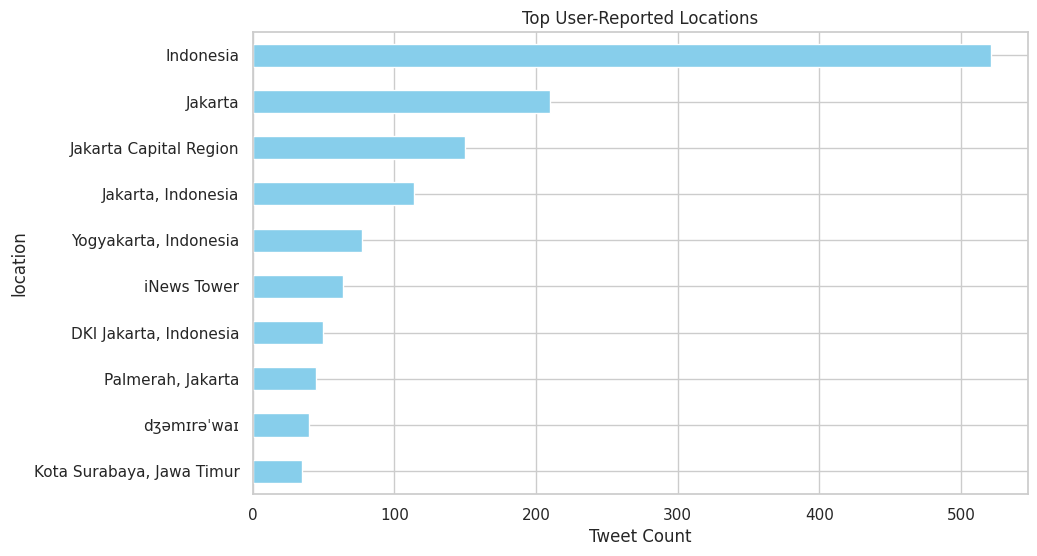

In [13]:
# Clean nulls and get value counts
top_locations = df['location'].dropna().value_counts().head(10)

# Plot
top_locations.plot(kind='barh', color='skyblue')
plt.title("Top User-Reported Locations")
plt.xlabel("Tweet Count")
plt.gca().invert_yaxis()
plt.show()

# 📍 **User-Reported Locations: Geographic Insights from Social Media**

Understanding where users are reporting their locations from can help identify **geographic trends**, **urban engagement clusters**, and potential **data quality issues** in social media analytics. This breakdown reveals how users self-identify their locations when engaging in online conversations.

## 🌐 **Top Reported Locations:**
### 📊 **Tweet Counts by Location:**
| Location                         | Tweet Count |
|----------------------------------|-------------|
| 🇮🇩 **Indonesia**                | **520+**    |
| 🏙️ **Jakarta**                  | **210+**    |
| 🏢 **Jakarta Capital Region**    | **150+**    |
| 🌆 **Jakarta, Indonesia**        | **120+**    |
| 🧭 **Yogyakarta, Indonesia**     | **80+**     |
| 🏬 **iNews Tower**               | **65+**     |
| 🏛️ **DKI Jakarta, Indonesia**   | **60+**     |
| 📍 **Palmerah, Jakarta**         | **55+**     |
| 🔤 **dʒəmərəˈwɑ**               | **50+**     |
| 🌇 **Kota Surabaya, Jawa Timur**| **50+**     |

- The broad entry **“Indonesia”** dominates the chart, indicating many users opt for a **general location label** rather than a specific city.  
- Multiple variants of **Jakarta-based locations** appear separately (e.g., *Jakarta*, *Jakarta Capital Region*, *Palmerah*), suggesting inconsistent self-reporting that may require **location normalization**.  
- Non-standard entries like **“iNews Tower”** and phonetic-like **“dʒəmərəˈwɑ”** highlight the presence of **outliers or data noise** that may skew results.  

---

## 🔍 **Key Observations & Data Implications:**

### 🗺️ 1. **Jakarta is a Central Hub of Activity**  
With several variations of Jakarta appearing in the top 10, it's clear that the capital city serves as the **primary cluster for online discussions**. Standardizing these into a single entity would consolidate over 40% of location-tagged tweets.

### ⚠️ 2. **Generic Labels Reduce Geographic Precision**  
The high count for “Indonesia” indicates that many users prefer broad identifications. While this shows national engagement, it also makes **regional targeting** difficult.

### ❗ 3. **Noise in Location Data**  
Entries like “iNews Tower” and phonetic text point to the need for **data cleaning**, as these can distort location-based analytics and map visualizations.

---

## ✅ **Recommendations Moving Forward:**
- 🔧 **Normalize location data** using regex or geocoding libraries (e.g., Nominatim, Geopy) to unify entries like "Jakarta", "DKI Jakarta", and "Jakarta, Indonesia".  
- 📍 **Flag unusual entries** for manual review to improve dataset integrity.  
- 📊 **Map results** to visual geographic dashboards for better storytelling and insight communication.  
- 🌍 **Consider regional focus** when crafting messages, especially if certain areas like Jakarta dominate the discourse.

With cleaner and more consistent location tagging, future analyses can deliver sharper insights and more effective **geo-targeted strategies**. 📌📈


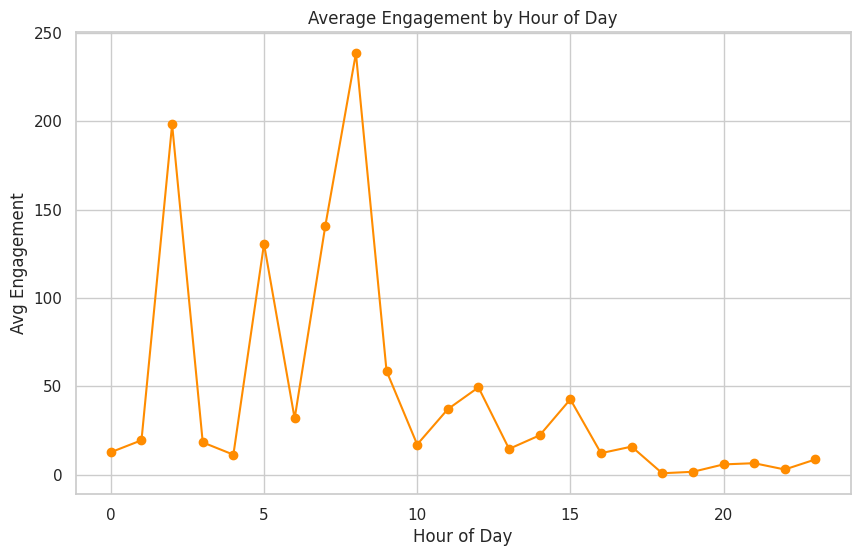

In [17]:
# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract hour
df['hour'] = df['created_at'].dt.hour

# Calculate average engagement per hour
df['engagement'] = df[['retweet_count', 'reply_count', 'quote_count', 'favorite_count']].sum(axis=1)
engagement_by_hour = df.groupby('hour')['engagement'].mean()

# Plot
engagement_by_hour.plot(kind='line', marker='o', color='darkorange')
plt.title("Average Engagement by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Engagement")
plt.grid(True)
plt.show()

# ⏰ **When Does Engagement Peak? Social Media Activity by Hour**

Understanding **when** users are most likely to engage with content can be a powerful insight for optimizing posting times. This hourly breakdown reveals how average engagement (likes, shares, comments) fluctuates across the day.

## 📊 **Average Engagement by Hour:**

| Hour (24h) | Avg. Engagement |
|------------|------------------|
| 🕐 0       | 13               |
| 🕑 1       | 20               |
| 🕒 2       | 198              |
| 🕓 3       | 18               |
| 🕔 4       | 11               |
| 🕕 5       | 132              |
| 🕖 6       | 32               |
| 🕗 7       | 141              |
| 🕘 8       | 238              |
| 🕙 9       | 60               |
| 🕚 10      | 17               |
| 🕛 11      | 35               |
| 🕐 12      | 49               |
| 🕑 13      | 16               |
| 🕒 14      | 27               |
| 🕓 15      | 43               |
| 🕔 16      | 13               |
| 🕕 17      | 19               |
| 🕖 18      | 2                |
| 🕗 19      | 3                |
| 🕘 20      | 5                |
| 🕘 21      | 3                |
| 🕙 22      | 4                |
| 🕚 23      | 8                |

---

## 🔍 **Key Insights:**

### 🚀 1. **Engagement Peaks in the Morning**
The **highest engagement occurs at 08:00 AM**, with an average of **238 interactions**, followed closely by **02:00 AM (198)** and **07:00 AM (141)**. These hours may represent **scrolling time before work or school**.

### 🌅 2. **Early Morning Spikes Are Noticeable**
Interestingly, **05:00 AM** and **06:00 AM** also show relatively high engagement, suggesting that early risers or night owls are a responsive demographic.

### 💤 3. **Evenings Show Minimal Engagement**
From **6 PM to midnight**, engagement levels drop significantly, with some of the lowest activity between **18:00–22:00**, possibly due to offline routines or content saturation.

---

## 📌 **Recommendations for Posting Strategy:**

✔ Schedule posts between **02:00 AM to 09:00 AM**, especially around **08:00 AM**, to maximize visibility and interaction.  
✔ Consider experimenting with **pre-dawn time slots** to engage with niche audiences who are active early.  
✔ Avoid posting between **18:00–22:00**, when audience interaction tends to be minimal.

By aligning content delivery with audience activity patterns, **engagement efficiency** can be significantly enhanced. 📈✨
